In [1]:
import json
import os
import pandas as pd
import ast
import numpy as np

# 筛选出指定排名的类别

Text(0.5, 1.0, 'class accuracy')

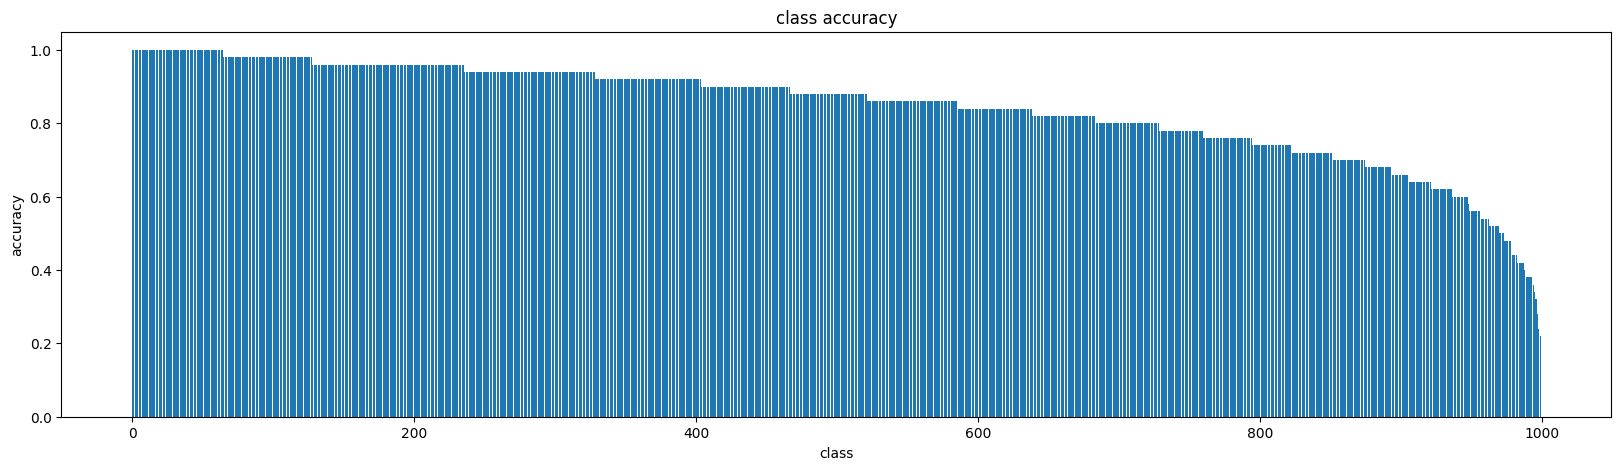

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

save_path = './data_stage2/class_acc_vit_b_16.json'
acc = json.load(open(save_path))

acc_values = list(acc.values())
acc_values = np.array(acc_values)


plt.figure(figsize=(20, 5))
plt.bar(range(len(acc_values)), acc_values)
plt.xlabel('class')
plt.ylabel('accuracy')
plt.title('class accuracy')

In [14]:
import random
unique_acc_values = set(acc.values())

# 根据唯一值分组
acc_groups = {value: [] for value in unique_acc_values}
for category, accuracy in acc.items():
    acc_groups[accuracy].append(category)

# 从每个分组中随机抽取一个类别
selected_categories = {random.choice(categories): accuracy for accuracy, categories in acc_groups.items()}

print(selected_categories)

{'n02417914': 0.98, 'n04487081': 1.0, 'n01795545': 0.92, 'n04486054': 0.94, 'n01855032': 0.96, 'n03729826': 0.9, 'n03485794': 0.88, 'n02096177': 0.86, 'n01677366': 0.84, 'n03530642': 0.82, 'n07860988': 0.58, 'n02493793': 0.5, 'n01756291': 0.42, 'n03710637': 0.34, 'n02487347': 0.76, 'n09193705': 0.68, 'n03125729': 0.6, 'n04591157': 0.52, 'n07930864': 0.44, 'n02107908': 0.36, 'n02105056': 0.78, 'n01667114': 0.7, 'n03642806': 0.28, 'n02114712': 0.62, 'n04152593': 0.22, 'n03793489': 0.54, 'n04356056': 0.38, 'n03947888': 0.8, 'n03970156': 0.72, 'n01753488': 0.64, 'n01693334': 0.56, 'n03045698': 0.48, 'n03782006': 0.4, 'n02979186': 0.32, 'n03476684': 0.74, 'n02123159': 0.24, 'n02229544': 0.66}


In [4]:
def select_class(ranks, save_path, imagenet_class_index_path='data/imagenet_class_index.json', chinese_class_index_path = 'data/chinese_class_index.json'):
    ''' 筛选出指定排名的类别
    
    Args:
    - ranks: list, 指定的排名
    - class_index_dict: dict, 类别索引
    - chinese_class_index_dict: dict, 中文类别索引
    - acc: dict, 所有类别准确率
    '''
    with open(imagenet_class_index_path) as f:
        class_index_dict = json.load(f)

    with open(chinese_class_index_path) as f:
        chinese_class_index_dict = json.load(f)
    
    acc = json.load(open(save_path))
    
    sorted_acc = sorted(acc.items(), key=lambda x: x[1], reverse=True)
    selected_items = {k: v for i, (k, v) in enumerate(sorted_acc) if i+1 in ranks}
    result = {}
    for rank, (class_code, accuracy) in zip(ranks, selected_items.items()):
        for id, (code, name) in class_index_dict.items():
            if code == class_code:
                chinese_name = chinese_class_index_dict[str(id)]
                corect_num = int(accuracy * 50)
                result[id] = [class_code, name, chinese_name, accuracy, corect_num, rank]
                break
    return result

In [5]:
save_path = 'data_stage2/class_acc_vit_b_16.json'
result = select_class([1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], save_path)
print(result)

{'1': ['n01443537', 'goldfish', '丁鲷', 1.0, 50, 1], '512': ['n03109150', 'corkscrew', '敞篷车', 0.98, 49, 100], '569': ['n03417042', 'garbage_truck', '裘皮大衣', 0.96, 48, 200], '642': ['n03721384', 'marimba', '沙球（一种打击乐器）', 0.94, 47, 300], '959': ['n07831146', 'carbonara', '干草', 0.92, 46, 400], '680': ['n03825788', 'nipple', '项链', 0.88, 44, 500], '314': ['n02233338', 'cockroach', '竹节虫', 0.84, 42, 600], '468': ['n02930766', 'cab', '肉铺,肉菜市场', 0.8, 40, 700], '382': ['n02494079', 'squirrel_monkey', '蜘蛛猴', 0.74, 37, 800], '460': ['n02894605', 'breakwater', '奶罩', 0.66, 33, 900], '782': ['n04152593', 'screen', '记分牌', 0.22, 11, 1000]}


# 对单步法结果文件进行处理

In [6]:
id2rankdict = {}
id_list = result.keys()
for id in id_list:
    id2rankdict[int(id)] = result[id][-1]
id2rankdict

{1: 1,
 512: 100,
 569: 200,
 642: 300,
 959: 400,
 680: 500,
 314: 600,
 468: 700,
 382: 800,
 460: 900,
 782: 1000}

In [5]:
data = pd.read_excel('./data_stage2/classified_single_attack/classified_single_attack_1010.xlsx')
data.head()

,index,model,algo,mask_mode,parameter,eta,pixel_attacked,attack_ratio_per_channel,l1_norm,l2_norm,success_rate,original_loss,loss_dict_attacked,picture_all,picture_attacked,run_time,rank
0,1,vit_b_16,fgsm,positive,NaN,0.01,75266,"[0.4992, 0.5007, 0.5001]",44.2947,0.016710,0.24,-0.029,{0.01: -1.273},50,11,20.838,1
1,1,vit_b_16,fgsm,negative,NaN,0.01,75261,"[0.5008, 0.4993, 0.4999]",44.3118,0.016843,0.24,-0.029,{0.01: -1.275},50,11,21.150,1
2,1,vit_b_16,fgsm,all,NaN,0.01,150528,"[1.0, 1.0, 1.0]",88.6064,0.033553,0.30,-0.029,{0.01: -1.824},50,14,20.858,1
3,1,vit_b_16,fgsm,topr,0.15,0.01,22579,"[0.143, 0.1969, 0.1101]",47.4759,0.029320,0.18,-0.029,{0.01: -0.979},50,8,21.189,1
4,1,vit_b_16,fgsm,lowr,0.85,0.01,127948,"[0.857, 0.8031, 0.8899]",41.1295,0.004232,0.26,-0.029,{0.01: -1.373},50,12,21.484,1


In [6]:
def mean_of_lists(series):
    # 将每个元素转换为 NumPy 数组，然后计算均值
    arrays = np.array(series.tolist(), dtype=float)
    return np.mean(arrays, axis=0).tolist()

def onestep_data(data): 
    '''将多个batch的数据合并''' 
    data['parameter'] = data['parameter'].fillna(-1)
    data['attack_ratio_per_channel'] = data['attack_ratio_per_channel'].apply(ast.literal_eval)
    data['rank'] = data['index'].map(id2rankdict)
    data[['R', 'G', 'B']] = pd.DataFrame(data['attack_ratio_per_channel'].tolist(), index=data.index)
    data.drop('attack_ratio_per_channel', axis=1, inplace=True)
    return data

In [7]:
data = onestep_data(data)
data.head()

,index,model,algo,mask_mode,parameter,eta,pixel_attacked,l1_norm,l2_norm,success_rate,original_loss,loss_dict_attacked,picture_all,picture_attacked,run_time,rank,R,G,B
0,1,vit_b_16,fgsm,positive,-1.00,0.01,75266,44.2947,0.016710,0.24,-0.029,{0.01: -1.273},50,11,20.838,1,0.4992,0.5007,0.5001
1,1,vit_b_16,fgsm,negative,-1.00,0.01,75261,44.3118,0.016843,0.24,-0.029,{0.01: -1.275},50,11,21.150,1,0.5008,0.4993,0.4999
2,1,vit_b_16,fgsm,all,-1.00,0.01,150528,88.6064,0.033553,0.30,-0.029,{0.01: -1.824},50,14,20.858,1,1.0000,1.0000,1.0000
3,1,vit_b_16,fgsm,topr,0.15,0.01,22579,47.4759,0.029320,0.18,-0.029,{0.01: -0.979},50,8,21.189,1,0.1430,0.1969,0.1101
4,1,vit_b_16,fgsm,lowr,0.85,0.01,127948,41.1295,0.004232,0.26,-0.029,{0.01: -1.373},50,12,21.484,1,0.8570,0.8031,0.8899


In [8]:
data.to_excel('./data_stage2/classified_single_attack/classified_single_attack_1010.xlsx', index=False)

# 多步法结果处理

In [7]:
data = pd.read_excel('./data_stage2/classified_multi_attack/classified_multi_attack_1011.xlsx')

In [8]:
def multi_step_data(data): 
    '''将多个batch的数据合并''' 
    data['parameter'] = data['parameter'].fillna(-1)
    data['rank'] = data['index'].map(id2rankdict)
    return data

In [9]:
data = multi_step_data(data)
data.head()

,index,model,algo,alpha,mask_mode,parameter,step,eta,l1_norm,l2_norm,success_rate,loss,run_time,rank
0,382,vit_b_16,i_fgsm,0.0001,positive,-1.0,0,0.01,112.2036,0.036851,0.0,-0.286,146.402,800
1,382,vit_b_16,i_fgsm,0.0001,positive,-1.0,1,0.01,120.2081,0.059887,0.0,-0.296,146.402,800
2,382,vit_b_16,i_fgsm,0.0001,positive,-1.0,2,0.01,115.6738,0.037533,0.0,-0.306,146.402,800
3,382,vit_b_16,i_fgsm,0.0001,positive,-1.0,3,0.01,112.8495,0.028667,0.0,-0.318,146.402,800
4,382,vit_b_16,i_fgsm,0.0001,positive,-1.0,4,0.01,114.7814,0.029569,0.0,-0.330,146.402,800


In [10]:
data.to_excel('./data_stage2/classified_multi_attack/classified_multi_attack_1011.xlsx', index=False)

# 结果分析